<a href="https://colab.research.google.com/github/dwishintya/coba/blob/main/sederhana%20bisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install subversion > /dev/null
!svn export https://github.com/dwishintya/coba/trunk/data > /dev/null

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import numpy as np 
import math, os, sys
import itertools

import matplotlib.pyplot as plt
plt.style.use('default')
from scipy import ndimage

from skimage import measure, morphology
from skimage.io import imsave, imread
from skimage.filters import threshold_otsu
from skimage.transform import resize

import tensorflow as tf
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import pip
from keras.preprocessing.image import img_to_array
from PIL import Image as pil_image
from PIL import ImagePath
from PIL import ImageShow
from keras.preprocessing.image import load_img

In [3]:
img = image.load_img('/content/data/image/train/SEGAR/B1.jpg')

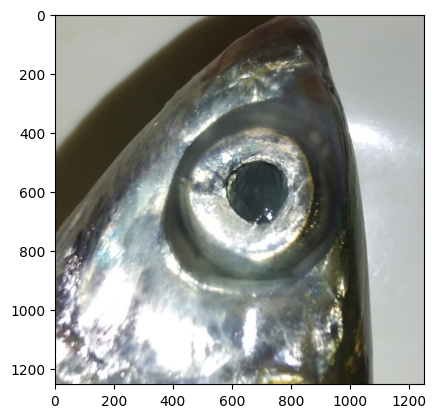

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("/content/data/image/train/SEGAR/B1.jpg").shape

(1254, 1254, 3)

In [6]:
train = ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [7]:

IMAGE_SIZE = 200
BATCH_SIZE = 3
base_dir = os.path.join('data/image/train')

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_dataset = datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary',
    subset='training')

validation_dataset = datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary',
    subset='validation')

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [8]:
train_dataset.class_indices


{'SEGAR': 0, 'TIDAK_SEGAR': 1}

In [9]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ###
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [10]:
print(model.weights)

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 16) dtype=float32, numpy=
array([[[[-0.03010939,  0.02071321,  0.18187335,  0.13553798,
          -0.08601978,  0.02813314, -0.10983877, -0.03209983,
          -0.12303264, -0.02199374,  0.13204348,  0.169501  ,
          -0.06855293,  0.07716072, -0.14762998, -0.17634508],
         [-0.15704222,  0.12536272,  0.1427452 ,  0.0081536 ,
           0.11591014, -0.14543486,  0.17304227, -0.07823618,
           0.17069453,  0.17115828, -0.0088708 , -0.04258138,
           0.08947462,  0.01960315, -0.15124059,  0.07037345],
         [ 0.10455054, -0.06082486,  0.03435409, -0.12784666,
          -0.05401552,  0.09647849, -0.10288911, -0.11097599,
           0.09515643, -0.02262899, -0.03101495,  0.12222251,
           0.11588612, -0.10073803, -0.14484797,  0.08210501]],

        [[ 0.17776757, -0.12806965,  0.07804328,  0.06605378,
           0.02960151,  0.14005941, -0.17290805,  0.0468832 ,
           0.08610404, -0.15491325, -0.00134744,  0.0

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [12]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

In [13]:
model_fit = model.fit(train_dataset,
                       steps_per_epoch =5,
                       epochs= 30,
                      validation_data=validation_dataset)

Epoch 1/30
5/5 [==============================] - 32s 202ms/step - loss: 3.5199 - accuracy: 0.7333 - val_loss: 2.3327 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 1s 140ms/step - loss: 1.1342 - accuracy: 0.5385 - val_loss: 1.2627 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 1s 122ms/step - loss: 0.7698 - accuracy: 0.5385 - val_loss: 0.7144 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 1s 116ms/step - loss: 1.6792 - accuracy: 0.6154 - val_loss: 0.6118 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - 1s 133ms/step - loss: 0.3304 - accuracy: 0.9333 - val_loss: 0.4183 - val_accuracy: 0.7500
Epoch 6/30
5/5 [==============================] - 1s 130ms/step - loss: 0.1249 - accuracy: 1.0000 - val_loss: 0.3469 - val_accuracy: 0.7500
Epoch 7/30
5/5 [==============================] - 1s 142ms/step - loss: 0.0437 - accuracy: 1.0000 - val_loss: 0.2675 - val_accuracy: 1.0000
Epoch 8/30
5/5 [===

In [14]:
prediction = model.predict(train_dataset)
print(prediction)

[[9.1602374e-08]
 [9.9999988e-01]
 [9.9999952e-01]
 [2.3409848e-07]
 [9.9999964e-01]
 [7.5632698e-08]
 [1.0000000e+00]
 [9.9999988e-01]
 [1.8119151e-07]
 [9.9999988e-01]
 [7.0879395e-08]
 [1.9559318e-06]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.3427961e-07]
 [1.3694419e-08]]


In [15]:
threshold=0.5
mOutput=(prediction>0.5).astype(int)
print(mOutput)

[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]


In [18]:
dir_path = '/content/test/1.jpg'
#for i in os.listdir(dir_path ):
img = image.load_img('/content/data/image/train/SEGAR/B2.jpg', target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
predictions = (model.predict(images, batch_size=2) > 0.5).astype("int32")
print(predictions)


[[0]]
